In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 1. Frame the problem and look at the big picture


How to idientify handwritten digits?

### 2. Get the Data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

### 3. Explore the data to gain insights

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
# Capture the data and target into X, y variables respectively.
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
y.shape

(70000,)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

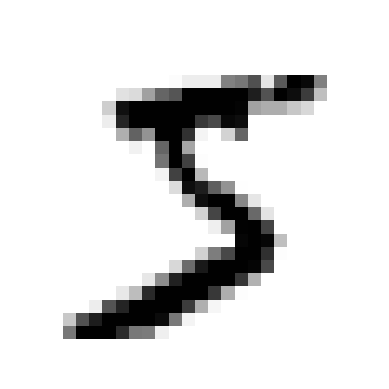

In [9]:
# Display a digit from the dataset using matplolib.
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

In [10]:
y[0]

'5'

In [11]:
y = y.astype(np.uint8)

### 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

In [12]:
# Split the data into a train and a test set.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 5. Explore many different models and short-list the best ones

#### Training a Binary Classifier

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=51)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=51)

In [15]:
# let's make a prediction
sgd_clf.predict([some_digit])

array([ True])

### Performance Measures
#### Measuring Accuracy Using Cross_Validation

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96005, 0.9629 , 0.95485])

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
# Calculate the precision and recall scores.
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8897617177271537

In [19]:
recall_score(y_train_5, y_train_pred)

0.626821619627375

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7354978354978355

#### Multiclass Classification

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto', random_state=51)
svm_clf.fit(X_train[:10000], y_train[:10000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [22]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 3.83583746,  8.03753281,  2.82800123,  5.86497842,  1.82010815,
         9.29488575,  4.84708487,  6.91484871, -0.2012942 ,  0.81874843]])

In [23]:
np.argmax(some_digit_scores)

5

In [24]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
svm_clf.classes_[5]

5

In [26]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_clf, X_train[:10000], y_train[:10000], cv=3, scoring='accuracy')
svm_scores

array([0.11277744, 0.11281128, 0.11251125])

#### Precision and Recall